In [34]:
pip install pandas scikit-learn matplotlib seaborn

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from google.colab import files

In [36]:
uploaded = files.upload()
df = pd.read_csv("heart.csv")  # Replace 'heart.csv' with your actual file name
print(df)

Saving heart.csv to heart (2).csv
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


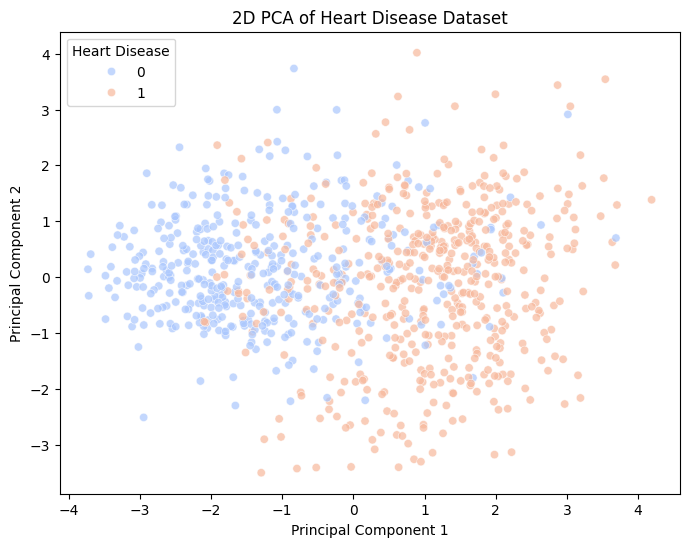

Explained Variance Ratio: [0.2619465  0.13093813]


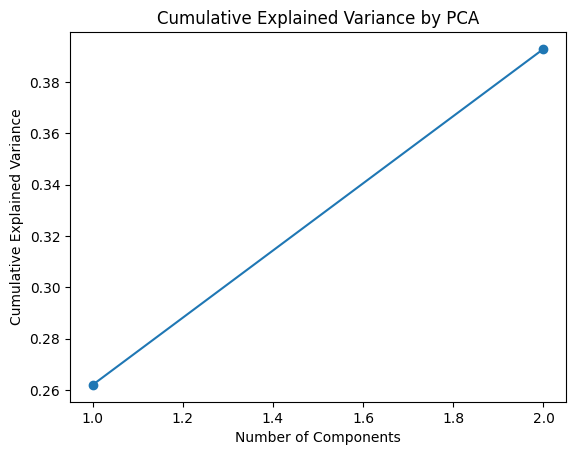

In [51]:
df.info() #to view all the data

df.describe()

df.Sex.replace({'F':0, 'M':1}, inplace =True)
df.ChestPainType.replace({'ATA':0, 'NAP':1, 'ASY':2, 'TA':3}, inplace =True)
df.RestingECG.replace({'Normal':0, 'ST':1, 'LVH':2}, inplace =True)
df.ExerciseAngina.replace({'N':0, 'Y':1}, inplace =True)
df.ST_Slope.replace({'Up':0, 'Flat':1, 'Down':2}, inplace =True)

df.head(10)


# Separate the target variable (HeartDisease) from the feature variables
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Initialize PCA with 2 components (2D projection)
pca = PCA(n_components=2)


# Fit and transform the standardized data
X_pca = pca.fit_transform(X_scaled)
pca.get_covariance()

explained_variance=pca.explained_variance_ratio_
explained_variance
# Convert the result into a DataFrame for easy handling
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y  # Adding the target variable for visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()


# Print the explained variance ratio of the components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# Plot cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

